## <div align="center">**PART 1**

## **(a)**

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Defining the probabilty density function f(x)
def f(x):
    return 0.5 * np.exp(-np.abs(x))


In [46]:
# Implementing the Random walk Metropolis algorithm:

def random_walk_metropolis(N, s, x0): # N is the number of generated samples, s is the standard deviation and x0 is the initial value.
    
    x = np.zeros(N)  # Creating an array x of length N, filled with zeros.
    
    x[0] = x0  # First element of array x is the initial value x0.

    for i in range(1, N):

        # Simulating a random number x* from a Normal Distribution with mean xi-1 and standard deviation s.
        x_star = np.random.normal(loc=x[i-1], scale=s) 
        
        # Calculating the acceptance ratio.
        ratio = f(x_star) / f(x[i-1])  # x* is the proposed sample and x[i-1] is the current sample.

        u = np.random.uniform(0, 1)  # Generating a random number between 0 and 1, following a Uniform Distribution.
        
        # Deciding if the proposed sample x* should be accepted or rejected.
        if np.log(u) < np.log(ratio):
            x[i] = x_star
        else:
            x[i] = x[i-1]
    
    return x

In [47]:
# Parameters to be used:
N = 10000
s = 1
x0 = 0

# Generating samples using the Random walk Metropolis algorithm.
samples = random_walk_metropolis(N, s, x0)

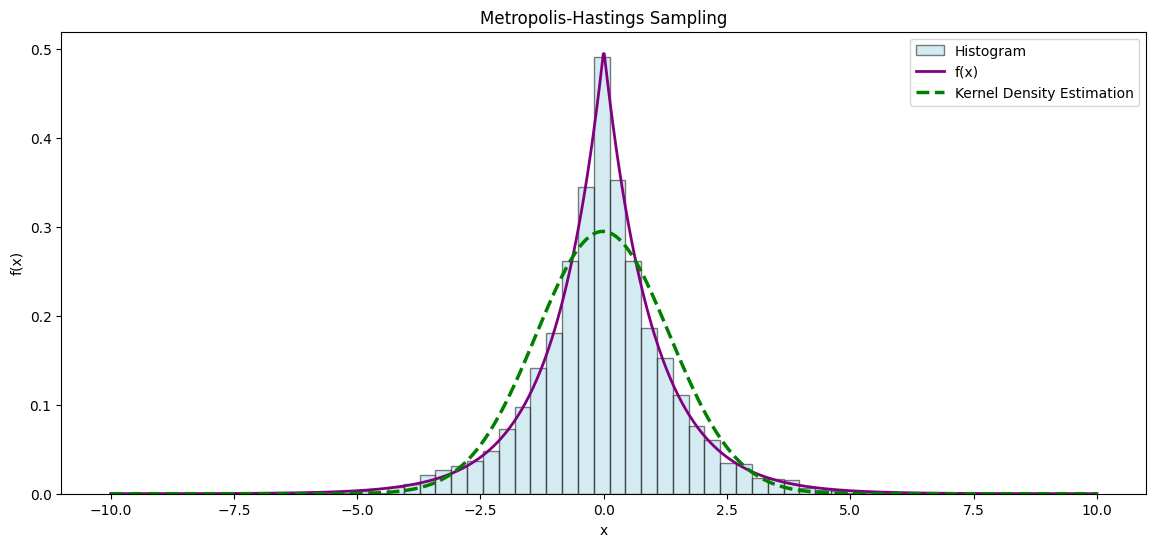

In [48]:
# Plotting the Histogram and Kernel Density plot.
plt.figure(figsize=(14, 6))

plt.hist(samples, bins=40, density=True, alpha=0.5, color='lightblue',edgecolor='black',label='Histogram')  #Histogram graph details.

# Graph details of probability density function f(x)
plt.plot(np.linspace(-10, 10, 1000), f(np.linspace(-10, 10, 1000)), color='purple',linewidth=2, label='f(x)')

kde = norm(np.mean(samples), np.std(samples)).pdf
x_kde = np.linspace(-10, 10, 1000)
plt.plot(x_kde, kde(x_kde), linestyle='--', color='green',linewidth=2.5, label='Kernel Density Estimation') #Kernel Density plot details.

# General graph details.
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Metropolis-Hastings Sampling')
plt.legend()

In [49]:
# Calculating and displaying the Sample Mean and Standard Deviation

 #Sample Mean
sample_mean = np.mean(samples) 
print("Sample Mean:", sample_mean)

#Sample Standard Deviation
sample_std = np.std(samples)  
print("Sample Standard Deviation:", sample_std)


Sample Mean: -0.019471814295390518
Sample Standard Deviation: 1.351812254187006


# **(b)**

In [59]:
import numpy as np

In [60]:
# The R^ value is denoted as "Rb" in the codes below.

# J represents the number of independant chains(for j = 1,2,...J) and N represents the length of each chain.

# "chains" is a 2-dimensional numpy array of shape (J,N) to store R^ values.

In [61]:
# Defining a function to calculate the R^ value:
def calculating_Rb(chains):

    Mj = np.mean(chains, axis=1) # Calculating the mean of the jth chain.
    
    Vj = np.var(chains, axis=1) # Calculating the within sample variance of the jth chain.
    
    W = np.mean(Vj) # Calculating the overall within sample variance across all the chains.
   
    M = np.mean(Mj) # Calculating the overall sample mean across all the chains.

    B = np.mean((Mj - M)**2) # Calculating the between sample variance.

    Rb = np.sqrt((B + W) / W) # Calculating the R^ value 
    return Rb 

In [69]:
# Running multiple chains using the random walk Metropolis algorithm and collecting R^ values into chains array.

def run_chains(N, s, J, x0):  
    chains = np.array([random_walk_metropolis(N, s, x0) for j in range(J)])
    return chains

In [72]:
# Parameters for the R^ value

N = 2000     # Number of iterations.
s = 0.001    # Standard deviation
J = 4        # Number of chains
x0 = 0       # Initial value of each chain

# Executing multiple chains using the above parameters and storing them in the chains array.
chains = run_chains(N, s, J, x0)

In [73]:
# Calculating and displaying the required R^ value.
Rb = calculating_Rb(chains)
print("Rb value:", Rb)

Rb value: 1.1875116707310474


In [74]:

import matplotlib.pyplot as plt

In [75]:
# Defining a function to run multiple chains and calculate R^ values for a given s value.
def Rb_for_given_s(N, s, J, x0):
    chains = np.array([random_walk_metropolis(N, s, x0) for j in range(J)])

    return calculating_Rb(chains)  #adding the R^ values to the chains array.

In [76]:
# Creating an array of 100 evenly spaced s values, between 0.001 and 1 inclusive.
s_values = np.linspace(0.001, 1, 100)

# Generating a list containing the Rb values calculated for each s value in the above array.
Rb_values = [Rb_for_given_s(N, s, J, x0) for s in s_values]

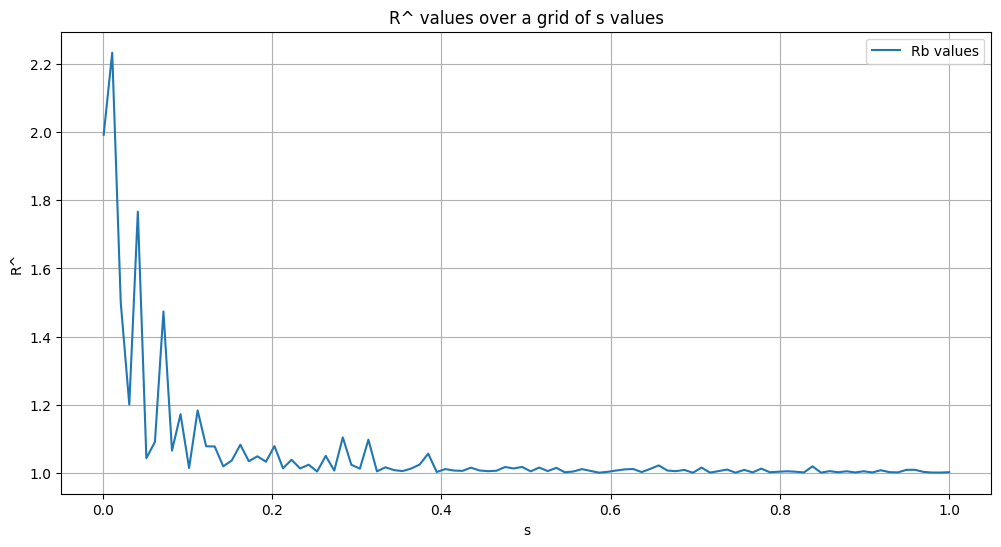

In [77]:
# Plotting R^ values over a grid of s values

plt.figure(figsize=(12, 6))
plt.plot(s_values, Rb_values, label='Rb values')
plt.xlabel('s')
plt.ylabel('R^')
plt.title('R^ values over a grid of s values')
plt.grid(True)
plt.legend()
plt.show()